In [1]:
import pandas as pd

def cargar_datos_excel(path):
    """
    Carga datos desde un archivo de Excel y los guarda en un DataFrame de pandas.

    Args:
    path (str): La ruta del archivo de Excel.

    Returns:
    pd.DataFrame: Un DataFrame con los datos cargados.
    """
    df = pd.read_excel(path)
    return df


In [2]:
from dateutil import parser
from datetime import datetime
def convertir_fecha(fecha_str):
    """
    Convierte una fecha en formato '12 de Junio de 2024' a un objeto datetime.

    Args:
    fecha_str (str): La fecha en formato de cadena.

    Returns:
    datetime: La fecha convertida en un objeto datetime.
    """
    meses = {
        'Enero': 1, 'Febrero': 2, 'Marzo': 3, 'Abril': 4, 'Mayo': 5, 'Junio': 6,
        'Julio': 7, 'Agosto': 8, 'Septiembre': 9, 'Octubre': 10, 'Noviembre': 11, 'Diciembre': 12
    }
    partes = fecha_str.split(' de ')
    dia = int(partes[0])
    mes = meses[partes[1]]
    año = int(partes[2])
    return datetime(año, mes, dia)

def procesar_fecha(df, columna_fecha):
    """
    Procesa una columna de fechas en un DataFrame, convirtiéndola a formato datetime,
    y añade columnas para el día de la semana, el mes y el año.

    Args:
    df (pd.DataFrame): El DataFrame que contiene los datos.
    columna_fecha (str): El nombre de la columna de fecha a procesar.

    Returns:
    pd.DataFrame: El DataFrame con las columnas adicionales añadidas.
    """
    # Convertir la columna de fecha usando la función personalizada
    df[columna_fecha] = df[columna_fecha].apply(convertir_fecha)

    # Crear una columna con el nombre del día de la semana
    df['dia'] = df[columna_fecha].dt.day_name()

    # Crear una columna con el nombre del mes
    df['mes'] = df[columna_fecha].dt.month_name()

    # Crear una columna con el año
    df['año'] = df[columna_fecha].dt.year
    df['numero_de_dia'] = df[columna_fecha].dt.day

    return df


In [3]:
path='./in/EDA_Baloto.xlsx'
df=cargar_datos_excel(path)

In [4]:
df=procesar_fecha(df,'fecha_sorteo')

In [5]:
df

,sorteo,fecha_sorteo,B1,B2,B3,B4,B5,yellows,reds,counter,dia,mes,año,numero_de_dia
0,2406,2024-06-12,4,9,15,20,34,"4, 9, 15, 20, 34",1,1,Wednesday,June,2024,12
1,2404,2024-06-05,3,19,24,38,39,"3, 19, 24, 38, 39",5,1,Wednesday,June,2024,5
2,2407,2024-06-15,6,10,18,40,43,"6, 10, 18, 40, 43",16,1,Saturday,June,2024,15
3,2403,2024-06-01,16,22,26,27,37,"16, 22, 26, 27, 37",9,1,Saturday,June,2024,1
4,2405,2024-06-08,5,16,17,29,38,"5, 16, 17, 29, 38",7,1,Saturday,June,2024,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
322,2084,2021-05-12,4,23,28,29,31,"4, 23, 28, 29, 31",16,1,Wednesday,May,2021,12
323,2085,2021-05-15,3,5,25,30,42,"3, 5, 25, 30, 42",8,1,Saturday,May,2021,15
324,2086,2021-05-19,9,12,16,21,30,"9, 12, 16, 21, 30",1,1,Wednesday,May,2021,19
325,2082,2021-05-05,2,5,10,23,34,"2, 5, 10, 23, 34",7,1,Wednesday,May,2021,5


In [6]:
import matplotlib.pyplot as plt
def grafico_linea(df, columna_x, columna_y):
    """
    Genera un gráfico de línea a partir de un DataFrame dado, utilizando una columna
    como el eje x y otra columna como el eje y.

    Args:
    df (pd.DataFrame): DataFrame que contiene los datos.
    columna_x (str): Nombre de la columna que se utilizará como eje x.
    columna_y (str): Nombre de la columna que se utilizará como eje y.

    Returns:
    None
    """
    # Verificar si las columnas especificadas existen en el DataFrame
    if columna_x not in df.columns or columna_y not in df.columns:
        raise ValueError("Las columnas especificadas no existen en el DataFrame.")
    
    # Obtener los datos para el gráfico
    x = df[columna_x]
    y = df[columna_y]

    # Crear el gráfico de línea
    plt.figure(figsize=(10, 6))  # Tamaño opcional del gráfico
    plt.plot(x, y, marker='o', linestyle='-', color='b', label=f'{columna_y} vs {columna_x}')
    plt.xlabel(columna_x)
    plt.ylabel(columna_y)
    plt.title(f'Gráfico de Línea: {columna_y} vs {columna_x}')
    plt.legend()
    plt.grid(True)
    plt.show()

In [7]:
def grafico_barras(df, columna_x, columna_y):
    """
    Genera un gráfico de barras a partir de un DataFrame dado, utilizando una columna
    como el eje x y otra columna como el eje y.

    Args:
    df (pd.DataFrame): DataFrame que contiene los datos.
    columna_x (str): Nombre de la columna que se utilizará como eje x.
    columna_y (str): Nombre de la columna que se utilizará como eje y.

    Returns:
    None
    """
    # Verificar si las columnas especificadas existen en el DataFrame
    if columna_x not in df.columns or columna_y not in df.columns:
        raise ValueError("Las columnas especificadas no existen en el DataFrame.")
    
    # Obtener los datos para el gráfico
    x = df[columna_x]
    y = df[columna_y]

    # Crear el gráfico de barras
    plt.figure(figsize=(10, 6))  # Tamaño opcional del gráfico
    plt.bar(x, y, color='b', label=f'{columna_y} vs {columna_x}')
    plt.xlabel(columna_x)
    plt.ylabel(columna_y)
    plt.title(f'Gráfico de Barras: {columna_y} vs {columna_x}')
    plt.legend()
    plt.xticks(rotation=45)  # Rotar etiquetas del eje x si es necesario
    plt.grid(True, axis='y')
    plt.show()


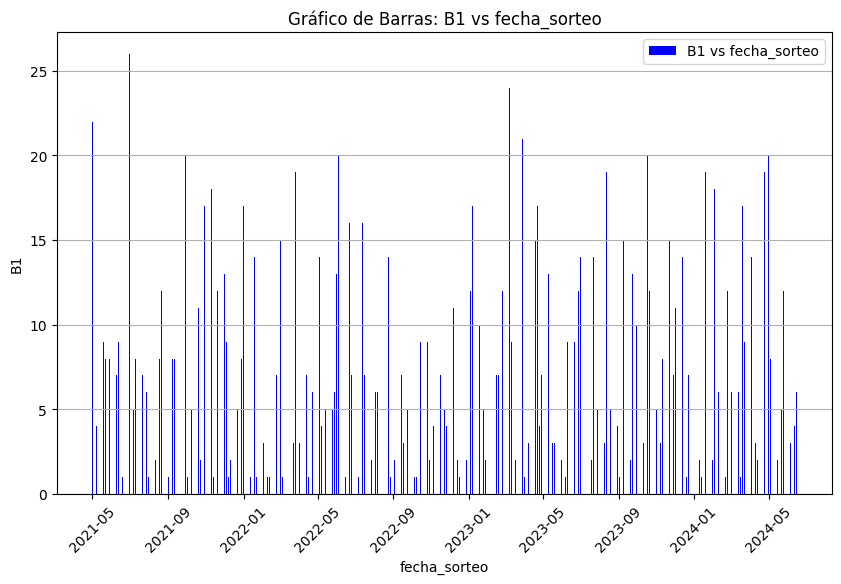

In [8]:
grafico_barras(df,'fecha_sorteo','B1')

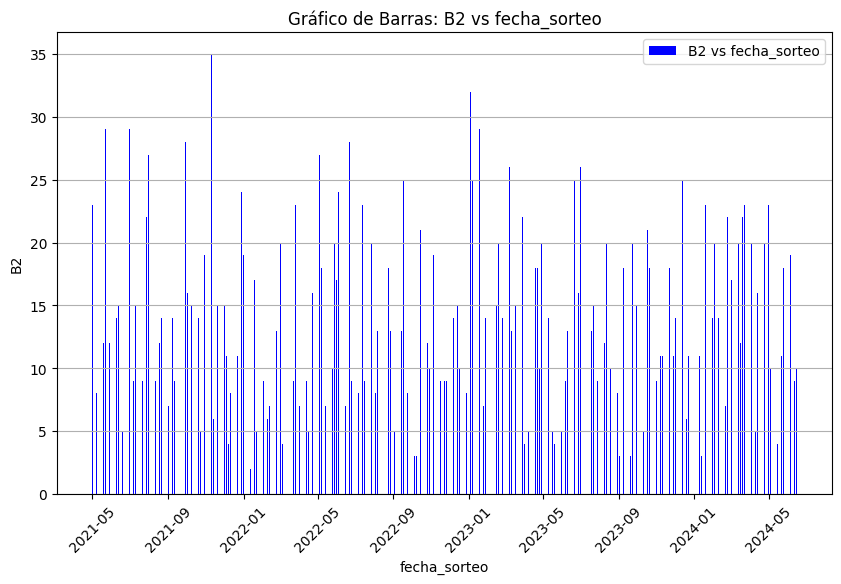

In [9]:
grafico_barras(df,'fecha_sorteo','B2')

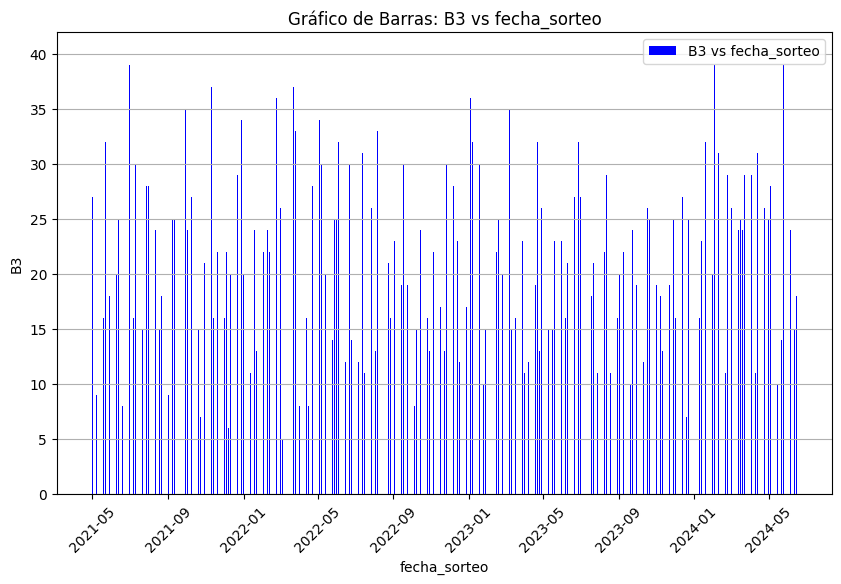

In [10]:
grafico_barras(df,'fecha_sorteo','B3')

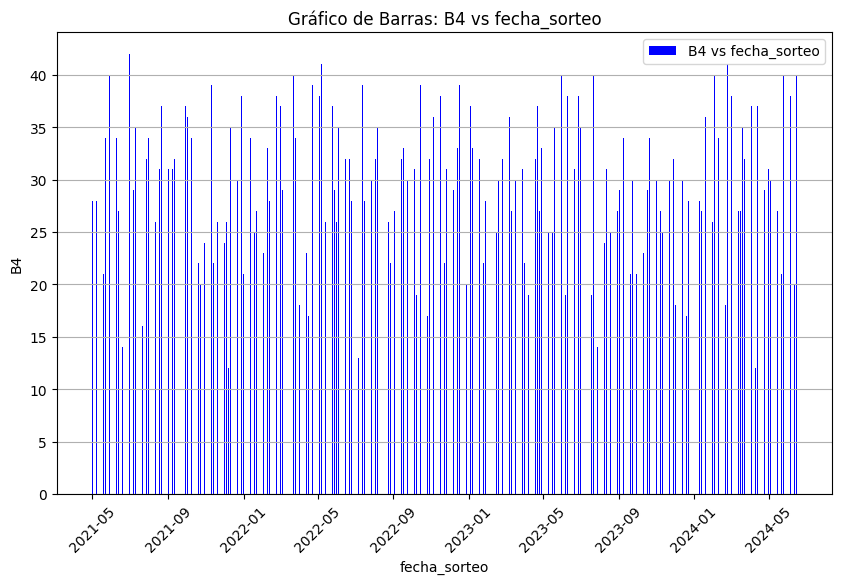

In [11]:
grafico_barras(df,'fecha_sorteo','B4')

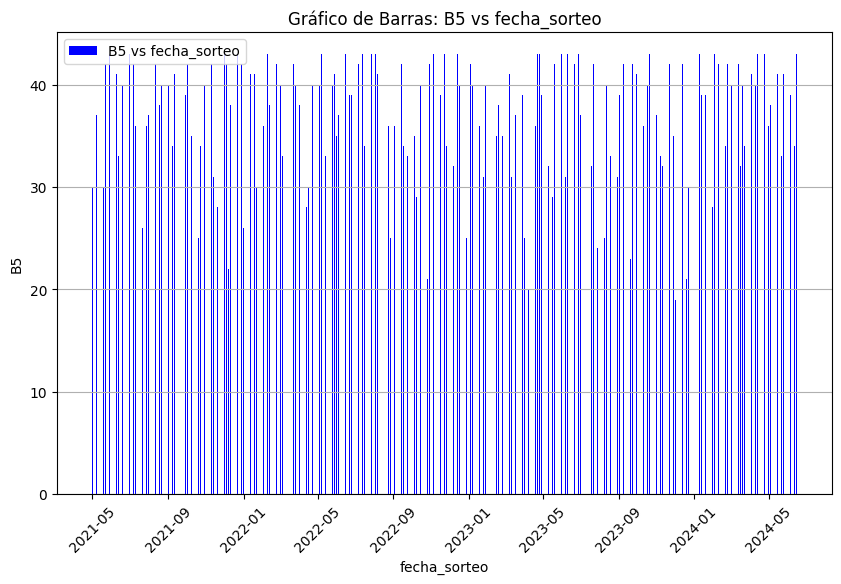

In [12]:
grafico_barras(df,'fecha_sorteo','B5')

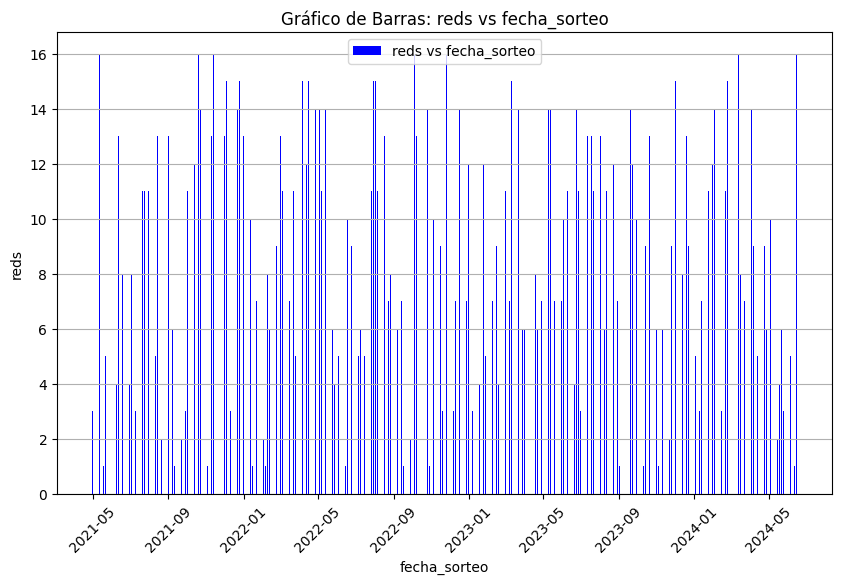

In [13]:
grafico_barras(df,'fecha_sorteo','reds')

In [14]:
import pandas as pd
from itertools import combinations

# Suponiendo que 'df' es tu DataFrame con los resultados de los sorteos

# Función para generar combinaciones de números
def generar_combinaciones(row):
    numeros = row[['B1', 'B2', 'B3', 'B4', 'B5', 'reds']].values
    combinaciones = list(combinations(numeros, 5))
    return combinaciones

# Aplicar la función a cada fila del DataFrame para obtener las combinaciones de números
df['combinaciones'] = df.apply(generar_combinaciones, axis=1)

# Explodir las combinaciones para tener una fila por cada combinación ganadora
df = df.explode('combinaciones')

# Contar la frecuencia de cada combinación
frecuencia_combinaciones = df['combinaciones'].value_counts()

# Mostrar las combinaciones más frecuentes
print("Frecuencia de combinaciones (sin importar el orden):")
print(frecuencia_combinaciones.head(5))  # Mostrar las 10 combinaciones más frecuentes

Frecuencia de combinaciones (sin importar el orden):
combinaciones
(23, 27, 28, 30, 3)    1
(4, 9, 15, 20, 34)     1
(4, 9, 15, 20, 1)      1
(4, 9, 15, 34, 1)      1
(4, 9, 20, 34, 1)      1
Name: count, dtype: int64
